
# FiftyOne Workshop: Loading and Exploring Datasets (March 12th 2025)

Welcome to this hands-on workshop where we will learn how to load and explore datasets using FiftyOne. 
This notebook will guide you through programmatic interaction via the **FiftyOne SDK** and visualization using the **FiftyOne App**.

## 🏆 Learning Objectives:
- Load datasets into FiftyOne from different sources.
- Understand the structure and metadata of datasets.
- Use FiftyOne’s querying and filtering capabilities.
- Interactively explore datasets in the FiftyOne App.

In this example, we use Hugging Face Hub for dataset loading, but you are encouraged to explore other sources like local files, cloud storage, or custom dataset loaders.

---


## In this notebook, we covered:
1. Loading datasets from Hugging Face Hub (extendable to other sources).
2. Exploring dataset structure and metadata.
3. Applying filtering and querying techniques to analyze data.
4. Utilizing the FiftyOne App for interactive visualization.
5. Clone dataset views and export your Data in FiftyOne Format 




## Requirements anf FiftyOne Installation

First thing you need to do is create a Python environment in your system, if you are not familiar with that please take a look of this [ReadmeFile](https://github.com/voxel51/fiftyone-examples?tab=readme-ov-file#-prerequisites-for-beginners-), where we will explain how to create the environment. After that be sure you activate the created environment and install FiftyOne there.

## Install FiftyOne

In [ ]:
#!pip install fiftyone


## 📥 Loading a Dataset into FiftyOne

FiftyOne provides multiple ways to import datasets, including:
- **Hugging Face Hub** (as demonstrated here)
- **Local files** (images, videos, or annotations in JSON, COCO, PASCAL VOC, etc.)
- **Cloud storage** (AWS S3, Google Drive, etc.) - Just for FiftyOne Enterprise

To load a dataset, we specify the source and format, ensuring FiftyOne properly indexes the data.

🔗 **Relevant Documentation:** [Dataset Importing in FiftyOne](https://voxel51.com/docs/fiftyone/user_guide/dataset_creation/index.html)

We are using [MVTec AD Dataset](https://www.mvtec.com/company/research/datasets/mvtec-ad) from [Voxel51 Hugging Face Hub](https://huggingface.co/datasets/Voxel51/mvtec-ad). The difference between the original resource and the Voxel51's one is the data structure, while in the first one we have a tree directory with category,in the second one we have an unstructure dataset with metadata such as ```categories.label```, and ```defect.label```.


In [ ]:
import fiftyone as fo # base library and app
import fiftyone.utils.huggingface as fouh # Hugging Face integration
dataset = fouh.load_from_hub("Voxel51/mvtec-ad", persistent=True, overwrite=True)
#dataset = fo.load_dataset("Voxel51/mvtec-ad") # Use this CLI if you already have the dataset 
                                               # in your disk or if this is not the first time you run this notebook 

Loading dataset
Importing samples...
 100% |███████████████| 5354/5354 [72.4ms elapsed, 0s remaining, 73.9K samples/s]   
Migrating dataset 'Voxel51/mvtec-ad' to v1.3.0



## 🧐 Exploring the Dataset

Once the dataset is loaded, we can inspect its structure using FiftyOne’s SDK.
We will explore:
- The number of samples in the dataset.
- Available metadata and labels.
- How images/videos are structured.

🔗 **Relevant Documentation:** [Inspecting Datasets in FiftyOne](https://docs.voxel51.com/user_guide/using_datasets.html#using-fiftyone-datasets)


In [2]:
print(dataset.last())  # Inspect the first or last sample

<Sample: {
    'id': '6621d76a324f6e05d5838ef7',
    'media_type': 'image',
    'filepath': '/Users/paularamos/fiftyone/huggingface/hub/Voxel51/mvtec-ad/data/data_53/009-101.png',
    'tags': [],
    'metadata': None,
    'created_at': datetime.datetime(2024, 4, 19, 2, 31, 6),
    'last_modified_at': datetime.datetime(2025, 3, 3, 19, 25, 7, 732000),
    'category': <Classification: {
        'id': '6621d769324f6e05d5837a0b',
        'tags': [],
        'label': 'grid',
        'confidence': None,
        'logits': None,
    }>,
    'defect': <Classification: {
        'id': '6621d769324f6e05d5837a0c',
        'tags': [],
        'label': 'thread',
        'confidence': None,
        'logits': None,
    }>,
    'split': 'test',
    'defect_mask': <Segmentation: {
        'id': '6621d769324f6e05d5837a0d',
        'tags': [],
        'mask': None,
        'mask_path': '/Users/paularamos/fiftyone/huggingface/hub/Voxel51/mvtec-ad/fields/defect_mask/defect_mask_12/009_mask-71.png',
    }>,
}

Connected to FiftyOne on port 5151 at localhost.
If you are not connecting to a remote session, you may need to start a new session and specify a port



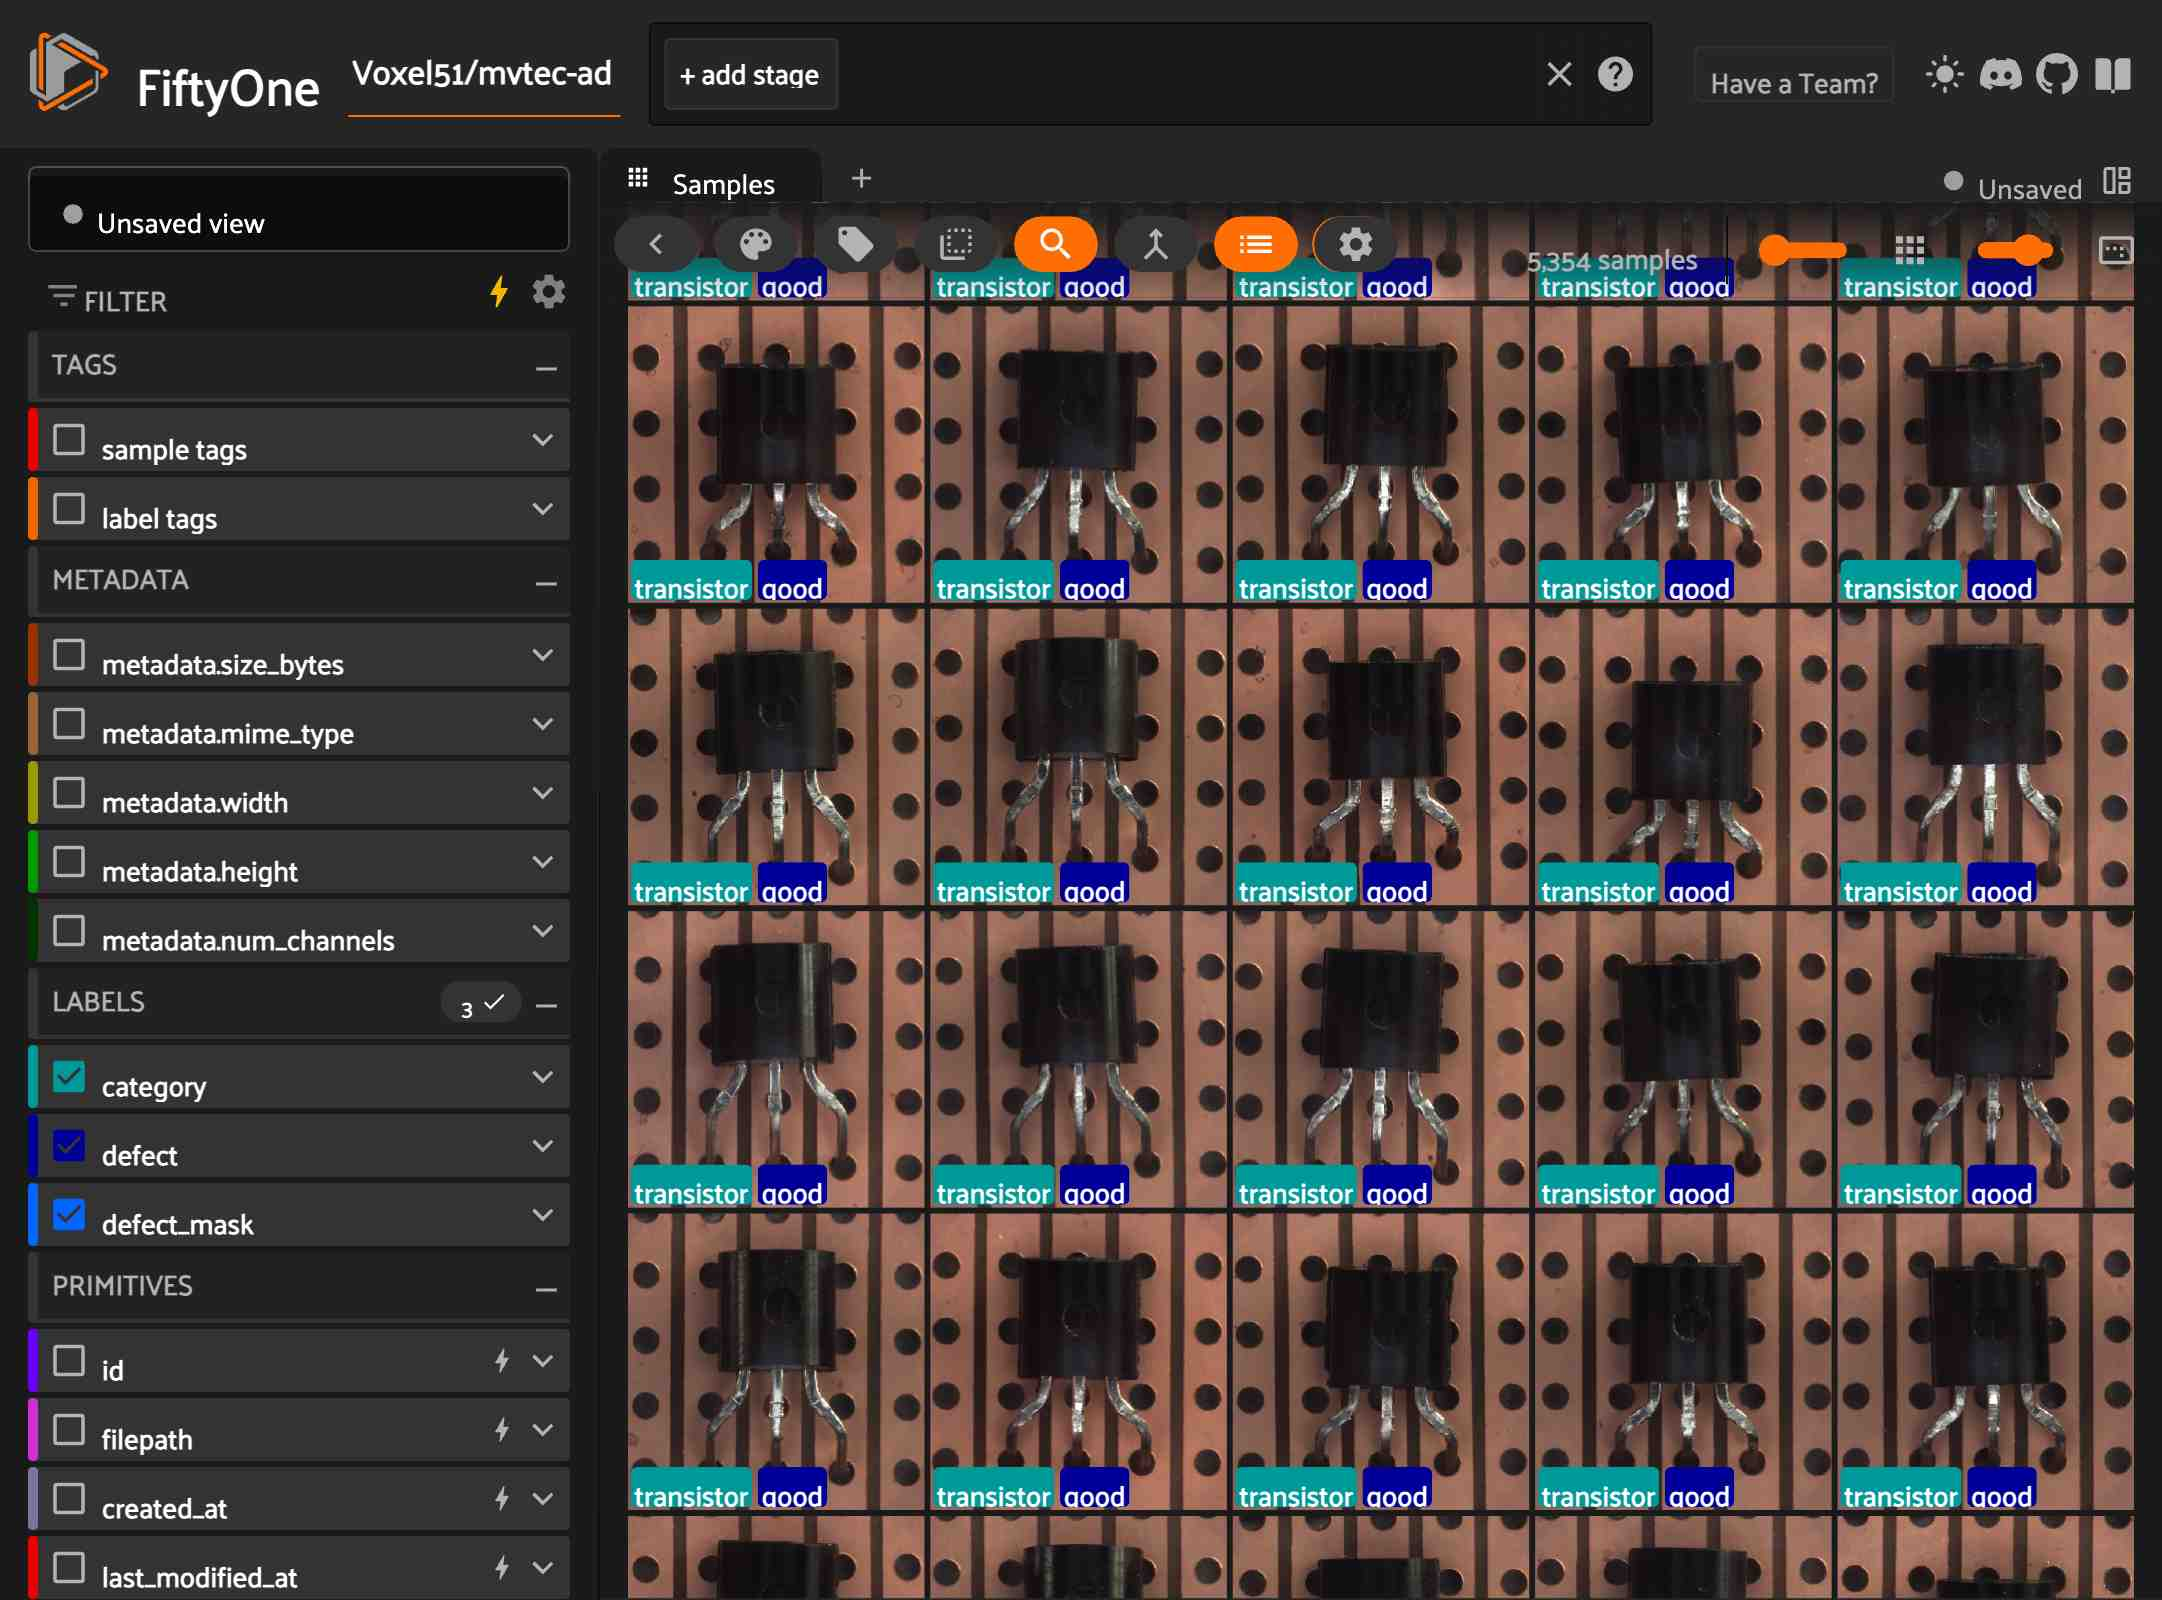

In [3]:
session = fo.launch_app(dataset)


## 🔍 Querying and Filtering

FiftyOne provides a powerful querying engine to filter and analyze datasets efficiently.
We can apply filters to:
- Retrieve specific labels (e.g., all images with "cat" labels).
- Apply confidence thresholds to object detections.
- Filter data based on metadata (e.g., image size, timestamp).

🔗 **Relevant Documentation:** [Dataset views](https://docs.voxel51.com/user_guide/using_views.html#dataset-views), [Querying Samples](https://docs.voxel51.com/user_guide/using_views.html#querying-samples), [Common filters](https://docs.voxel51.com/user_guide/using_views.html#querying-samples)

### Examples:
- Show all images containing a particular class.
- Retrieve samples with object detection confidence above a threshold.
- Filter out low-quality images based on metadata.


Dataset:     Voxel51/mvtec-ad
Media type:  image
Num samples: 91
Sample fields:
    id:               fiftyone.core.fields.ObjectIdField
    filepath:         fiftyone.core.fields.StringField
    tags:             fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:         fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    created_at:       fiftyone.core.fields.DateTimeField
    last_modified_at: fiftyone.core.fields.DateTimeField
    category:         fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Classification)
    defect:           fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Classification)
    split:            fiftyone.core.fields.StringField
    defect_mask:      fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Segmentation)
View stages:
    1. Match(filter={'$expr': {'$eq': [...]}})



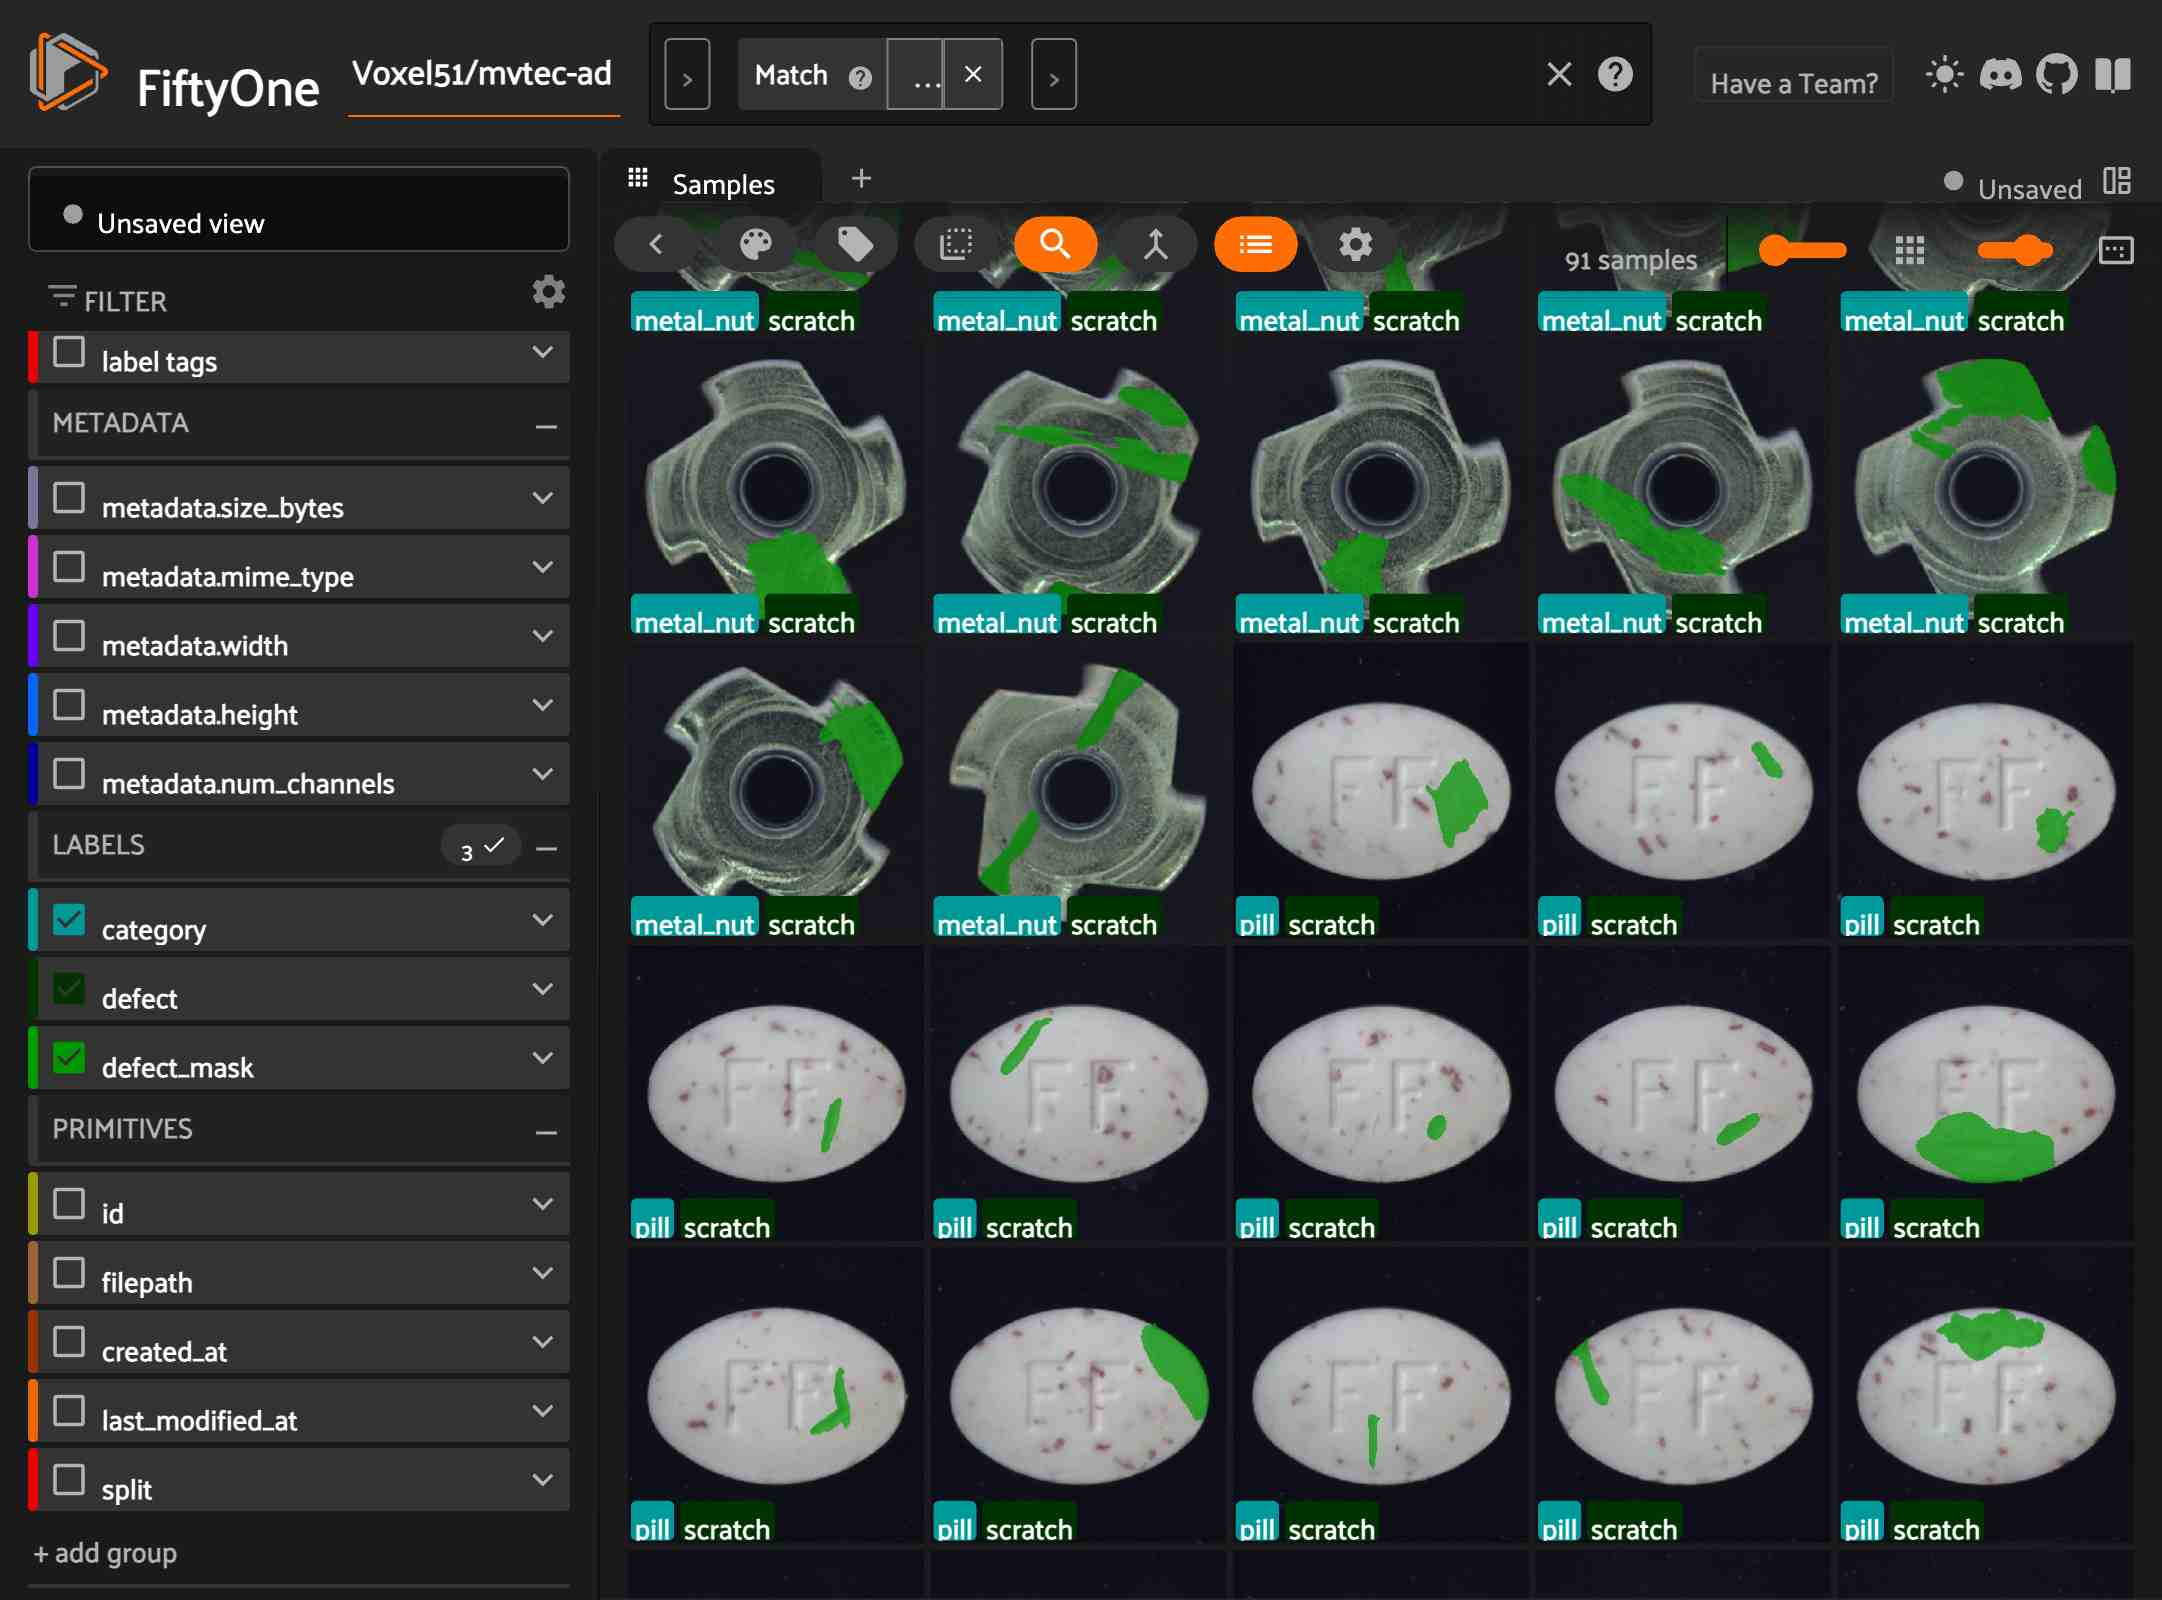

In [ ]:
import fiftyone.core.expressions as foe
# Query images where the defect is labeled as "scratch"
view = dataset.match(foe.ViewField("defect.label") == "scratch")
print(view)

# Launch FiftyOne App with the filtered dataset
session = fo.launch_app(view)


In [ ]:
filter = view.match(foe.ViewField("category.label") == "wood")
session.view = filter
print(filter)

Dataset:     Voxel51/mvtec-ad
Media type:  image
Num samples: 21
Sample fields:
    id:               fiftyone.core.fields.ObjectIdField
    filepath:         fiftyone.core.fields.StringField
    tags:             fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:         fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    created_at:       fiftyone.core.fields.DateTimeField
    last_modified_at: fiftyone.core.fields.DateTimeField
    category:         fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Classification)
    defect:           fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Classification)
    split:            fiftyone.core.fields.StringField
    defect_mask:      fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Segmentation)
View stages:
    1. Match(filter={'$expr': {'$eq': [...]}})
    2. Match(filter={'$expr': {'$eq': [...]}})



## 🖥️ Interactive Exploration with the FiftyOne App

The **FiftyOne App** allows users to interactively browse, filter, and analyze datasets.
This visual interface is an essential tool for understanding dataset composition and refining data exploration workflows.

Key features of the FiftyOne App:
- Interactive filtering of images/videos.
- Object detection visualization.
- Dataset statistics and metadata overview.

🔗 **Relevant Documentation:** [Using the FiftyOne App](https://voxel51.com/docs/fiftyone/user_guide/app.html)


### 💯 Testing Skills
### ❓ What is the defect with less counts in the wood category?

Checking Distribution of Defect Categories - Wood

In [ ]:
# ???? Exploring in the APP

## New dataset

Creates a new dataset containing a copy of the contents of the view.

In [6]:
new_dataset= view.clone()
print(new_dataset)

Name:        2025.03.03.14.52.34
Media type:  image
Num samples: 91
Persistent:  False
Tags:        []
Sample fields:
    id:               fiftyone.core.fields.ObjectIdField
    filepath:         fiftyone.core.fields.StringField
    tags:             fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:         fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    created_at:       fiftyone.core.fields.DateTimeField
    last_modified_at: fiftyone.core.fields.DateTimeField
    category:         fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Classification)
    defect:           fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Classification)
    split:            fiftyone.core.fields.StringField
    defect_mask:      fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Segmentation)


## Exporting Dataset to FiftyOneDataset

FiftyOne supports various dataset formats. In this notebook, we’ve worked with a custom dataset from Hugging Face Hub. Now, we export it into a FiftyOne-compatible dataset to leverage additional capabilities.

For more details on the dataset types supported by FiftyOne, refer to this [documentation](https://docs.voxel51.com/api/fiftyone.types.dataset_types.html?highlight=dataset%20type#module-fiftyone.types.dataset_types)

In [7]:
export_dir = "MVTec_scratch_wood"
new_dataset.export(
    export_dir=export_dir,
    dataset_type=fo.types.FiftyOneDataset,
)

Exporting samples...
 100% |██████████████████████| 91/91 [191.9ms elapsed, 0s remaining, 474.2 docs/s]      


### Next Steps:
Try modifying the dataset loading parameters, apply different filters, and explore the FiftyOne App’s visualization features! 🚀

🔗 **More Resources:**  
- [FiftyOne Docs](https://voxel51.com/docs/fiftyone/)  
- [FiftyOne Tutorials](https://voxel51.com/docs/fiftyone/tutorials/index.html)